# Данные

In [0]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-02-27 11:06:11--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [following]
--2019-02-27 11:06:11--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9bcc0bb178a726408f12c2b654.dl.dropboxusercontent.com/cd/0/inline/AcHwNhM4sYKl3B4lh3LCbPNCrbu7lGr-F6uX1hj1p69Ozv3wq0-t4dYxxvrPdLYjmiCB3z__py_McnbbttTZUHylkY3HxVdtT70lWnjLr0Gj2xU7SQyGJXdm6E1U-4VFDrc/file# [following]
--2019-02-27 11:06:11--  https://uc9bcc0bb178a726408f12c2b654.dl.dropboxusercontent.com/cd/0/inline/AcHwNhM4sYKl3B4lh3LCbPNCrbu7lGr-F6uX1hj1p69Ozv3wq0-t4dYxxvrPdLYjmiCB3z__py_

In [0]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


In [0]:
from google.colab import files
files.download('vk_texts_with_sources.csv') 

# Домашнее задание 1 

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [2 балла]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [0]:
!pip install pymorphy2

In [0]:
import re
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

print(len(df.text.unique()), len(df.source.unique()))

def parse(x):
  return re.findall('[а-яА-ЯёЁ]+', str(x))

def lemma(x):
  return [morph.parse(i)[0].normal_form for i in x]
          
df['words'] = df.text.apply(parse)

11150 4


In [0]:
df['lemmas'] = df.words.apply(lemma)
df.head()

,text,source,words,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[Начальник, Главного, оперативного, управления...","[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[Артиллерийские, подразделения, общевойскового...","[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[Подразделения, морской, пехоты, Каспийской, ф...","[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[Команды, на, всеармейских, этапах, конкурсов,...","[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[На, большом, учебно, методическом, командирск...","[на, большой, учебный, методический, командирс..."


In [0]:
words = []
j = [words.extend(i) for i in df.words.tolist()]
lemmas = []
h = [lemmas.extend(i) for i in df.lemmas.tolist()]
print(len(set(words)), len(set(lemmas)))

82297 28865


In [0]:
import numpy as np
n_words = []
n_symbols = []
def w_counter(x):
  global n_words
  n_words.append(len(x))
  
def s_counter(x):
  global n_symbols
  n_symbols.append(len(list(str(x))))
  
df.text.apply(s_counter)
df.words.apply(w_counter)
print(np.mean(n_words), np.mean(n_symbols))

82.46855913978494 684.9059784946237


In [0]:
gb = df[['lemmas', 'source']].groupby('source').sum()
nouns_of_class = []
import collections
for words in gb.lemmas.tolist():
  c = collections.Counter(words)
  g = [i for i, j in c.most_common(150) if morph.parse(i)[0].tag.POS == 'NOUN']
  nouns_of_class.append(g)
  print(g[:5])

['мчс', 'мчсроссия', 'россия', 'спасатель', 'год']
['военный', 'минобороны', 'год', 'россия', 'оборона']
['мвд', 'полиция', 'год', 'москва', 'россия']
['почта', 'россия', 'год', 'отделение', 'письмо']


Разделите коллекцию текстов на обучающую и тестовую части. 

In [0]:

train = df[:int(0.8*df.shape[0])]
test = df[int(0.8*df.shape[0]):]

или

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df.source)

 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

In [0]:
gb = train[['words', 'source']].groupby('source').sum()
nouns_of_class = []
import collections
for words in gb.words.tolist():
  c = collections.Counter(words)
  g = [i for i, j in c.most_common(150) if morph.parse(i)[0].tag.POS == 'NOUN']
  nouns_of_class.append(g)

In [0]:
mil, mchs, post, police =  set(nouns_of_class[1]),  set(nouns_of_class[0]), set(nouns_of_class[3]), set(nouns_of_class[2])
inter_gen = mil.intersection(mchs,post,police)

def unique_words(cl, others):
  u_words = cl
  for s in others:
    u_words -= cl.intersection(s)
  u_words -=inter_gen
  print(u_words)  
  return u_words

u_mil = unique_words(mil, [mchs, post, police])
u_mchs = unique_words(mchs, [mil, post, police])
u_post = unique_words(post, [mchs, mil, police])
u_police = unique_words(police, [mchs, post, mil])

{'км', 'ракет', 'подготовки', 'Шойгу', 'террористов', 'Минобороны', 'флота', 'системы', 'метров', 'М', 'авиации', 'условиях', 'соединения', 'море', 'экипажи', 'составе', 'объектов', 'вооружения', 'Министр', 'полигоне', 'корабля', 'тыс', 'СМ', 'подразделений', 'БоеваяПодготовка', 'местности', 'боевых', 'военного', 'Т', 'войск', 'цели', 'комплекса', 'Су', 'Ми', 'Сирии', 'задач', 'боевой', 'ИГИЛ', 'ВМФ', 'противника', 'числе', 'подразделения', 'стрельбы', 'стран', 'Сил', 'учения', 'МинобороныРоссии', 'МиГ', 'Сергей', 'действий', 'военных', 'армии', 'кораблей', 'целей', 'ПВО', 'задачи'}
{'помощи', 'МЧС', 'воду', 'защиты', 'ПамяткаМЧС', 'БудниМЧС', 'последствий', 'воды', 'Спасатели', 'Пучков', 'охраны', 'спасателей', 'выпуске', 'воде', 'спасатели', 'людей', 'дома', 'правилам', 'пожара', 'помощь', 'пожаров', 'МаленькаяСпасеннаяЖизнь', 'МЧСРОССИИ', 'Глава', 'техники', 'обороны', 'спасения', 'ТехникаМЧС', 'человек', 'центра', 'жизни', 'части', 'ликвидации', 'отряда', 'СМИобМЧС', 'Владимир', 'р

In [0]:
import random
def score(x):
  res = []
  for word in x:
    s = 0
    for cl in u_mil, u_mchs, u_post, u_police:
      s+=1
      if word in cl:
        res.append(s)
  if len(res)!=0:
    return collections.Counter(res).most_common(1)[0][0]
  else:
    return random.randint(1,4)

print(score(df.words[0]))

1


In [0]:
test['y_pred'] = test.words.apply(score)
trans_dict = {'mil':1, 'mchsgov':2, 'russianpost':3, 'mospolice':4}
def transform(x):
  return trans_dict[x]
test['y_true'] = test.source.apply(transform)
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,text,source,words,lemmas,y_pred,y_true
9300,Оперативники района Новогиреево задержали подо...,mospolice,"[Оперативники, района, Новогиреево, задержали,...","[оперативник, район, новогиреево, задержать, п...",4,4
9301,Оперативниками Западного округа задержана подо...,mospolice,"[Оперативниками, Западного, округа, задержана,...","[оперативник, западный, округа, задержать, под...",4,4
9302,Полицейские Южного округа столицы поздравили в...,mospolice,"[Полицейские, Южного, округа, столицы, поздрав...","[полицейский, южный, округа, столица, поздрави...",4,4
9303,Владимир Колокольцев подписал приказ о награжд...,mospolice,"[Владимир, Колокольцев, подписал, приказ, о, н...","[владимир, колоколец, подписать, приказ, о, на...",4,4
9304,День открытых дверей в Московском университете...,mospolice,"[День, открытых, дверей, в, Московском, универ...","[день, открытый, дверь, в, московский, универс...",4,4


In [0]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

precision = precision_score(test.y_true, test.y_pred, average='macro')
acc = accuracy_score(test.y_true, test.y_pred)
rec = recall_score(test.y_true, test.y_pred, average='macro')

print(acc, precision, rec)

0.9668817204301076 0.25 0.2417204301075269


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Задание 3 [4 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [0]:
from sklearn.model_selection import train_test_split
df['content'] = df.words.apply(' '.join)
#X_train, X_test, y_train, y_test = train_test_split(df['content'], df.source)
df['y_true'] = df.source.apply(transform)
from sklearn.utils import shuffle
df = shuffle(df)
train = df[:int(0.8*df.shape[0])]
test = df[int(0.8*df.shape[0]):]
train.head()

,text,source,words,lemmas,content,y_true
3462,#МЧС #МЧСРОССИИ<br><br>Спасатели оказали помощ...,mchsgov,"[МЧС, МЧСРОССИИ, Спасатели, оказали, помощь, в...","[мчс, мчсроссия, спасатель, оказать, помощь, в...",МЧС МЧСРОССИИ Спасатели оказали помощь водител...,2
6015,Почта России поздравляет вас с 1 мая – Праздни...,mchsgov,"[Почта, России, поздравляет, вас, с, мая, Праз...","[почта, россия, поздравлять, вы, с, май, празд...",Почта России поздравляет вас с мая Праздником ...,2
11001,День выпускника в Московском университете МВД ...,mospolice,"[День, выпускника, в, Московском, университете...","[день, выпускник, в, московский, университет, ...",День выпускника в Московском университете МВД ...,4
9904,Сотрудники московского уголовного розыска заде...,mospolice,"[Сотрудники, московского, уголовного, розыска,...","[сотрудник, московский, уголовный, розыск, зад...",Сотрудники московского уголовного розыска заде...,4
49,Корабли Тихоокеанского флота в кильватерном ст...,mil,"[Корабли, Тихоокеанского, флота, в, кильватерн...","[корабль, тихоокеанский, флот, в, кильватерный...",Корабли Тихоокеанского флота в кильватерном ст...,1


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
text_clf.fit(train.content, train.y_true)  
predicted = text_clf.predict(test.content)

def evaluate(y_test, predicted):
  precision = precision_score(y_test, predicted, average='macro')
  acc = accuracy_score(y_test, predicted)
  rec = recall_score(y_test, predicted, average='macro')
  return acc, precision, rec

print(evaluate(test.y_true, predicted))


(0.9535483870967741, 0.95321440927332, 0.9533224395394521)


## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [0]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import AdaBoostClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('svd', TruncatedSVD(n_components=95, random_state=42, algorithm='arpack')),
                     ('clf', AdaBoostClassifier(algorithm ='SAMME.R')),])
text_clf.fit(train.content, train.y_true)  
predicted = text_clf.predict(test.content)

print(evaluate(test.y_true, predicted))


(0.8881720430107527, 0.8931105596278947, 0.8895642426737449)


## Задание 5 [2 балла]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [0]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('svd', TruncatedSVD(n_components=95, random_state=42, algorithm='arpack')),
                     ('clf', AdaBoostClassifier(algorithm ='SAMME.R')),])
text_clf.fit(train.lemmas.apply(' '.join), train.y_true)  
predicted = text_clf.predict(test.lemmas.apply(' '.join))

print(evaluate(test.y_true, predicted))


(0.9496774193548387, 0.9494628334192432, 0.9487392761838638)


## Задание 6 [4 балла]. Модель скрытых тем
Постройте и визуализируйте модель скрытых тем (LSI или LDA) по данной коллекции текстов. Нужно ли здесь использовать разделение на тестовую и обучающую части? Как модель скрытых тем может помочь в решении задачи классификации?

In [0]:
df.head()

,text,source,words,lemmas,content,y_true
3462,#МЧС #МЧСРОССИИ<br><br>Спасатели оказали помощ...,mchsgov,"[МЧС, МЧСРОССИИ, Спасатели, оказали, помощь, в...","[мчс, мчсроссия, спасатель, оказать, помощь, в...",МЧС МЧСРОССИИ Спасатели оказали помощь водител...,2
6015,Почта России поздравляет вас с 1 мая – Праздни...,mchsgov,"[Почта, России, поздравляет, вас, с, мая, Праз...","[почта, россия, поздравлять, вы, с, май, празд...",Почта России поздравляет вас с мая Праздником ...,2
11001,День выпускника в Московском университете МВД ...,mospolice,"[День, выпускника, в, Московском, университете...","[день, выпускник, в, московский, университет, ...",День выпускника в Московском университете МВД ...,4
9904,Сотрудники московского уголовного розыска заде...,mospolice,"[Сотрудники, московского, уголовного, розыска,...","[сотрудник, московский, уголовный, розыск, зад...",Сотрудники московского уголовного розыска заде...,4
49,Корабли Тихоокеанского флота в кильватерном ст...,mil,"[Корабли, Тихоокеанского, флота, в, кильватерн...","[корабль, тихоокеанский, флот, в, кильватерный...",Корабли Тихоокеанского флота в кильватерном ст...,1


In [0]:
from gensim.models import LsiModel
from gensim.corpora import *
texts = [train.content.iloc[i].split() for i in range(len(train))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim.models import  *
from gensim import similarities

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


lsi = LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


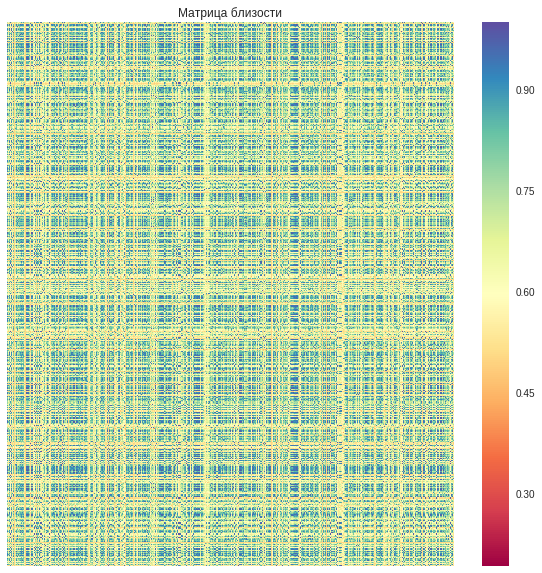

In [0]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt

corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims  = (sims + 1)/2.
plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

## Задание 7 [4 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

## Задание 8 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

## Конец
Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает. 

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке под названием `ML_HW1.ipynb`.
2. Тетрадку можно загрузить либо на GitHub (и в таком случае лучше создать для домашек по курсу отдельный репозиторий), либо в Colab.
3. Ссылку на домашку нужно оставить [вот в этом опросе](https://goo.gl/forms/JpWWwKEZRkfy8OS02). 
4. Задание выполняется в группах 1-3 человека.
5. Все вычисления должны быть снабжены пояснениями!
6. Дедлайн – 3 марта в 10.00.

**NB!** Если вы даете ссылку на Colab, то обязательно делайте это через "Share", а не просто копируйте ее из адресной строки. 